In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.read_csv('/Users/prateeklodha/Desktop/data analysis/data_jobs.csv')
df['job_posted_date']=pd.to_datetime(df.job_posted_date)



In [17]:

import ast

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    

df['job_skills'] = df['job_skills'].apply(clean_list)



In [23]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


<Axes: ylabel='job_skills'>

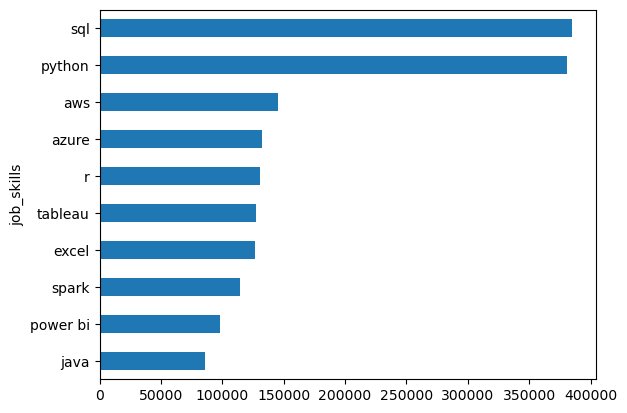

In [ ]:
df_exploded=df.explode('job_skills')

# df_exploded['job_skills'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')



In [37]:
skills_count=df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [40]:
df_skills_count = skills_count.reset_index(name='job count')

df_skills_count = df_skills_count.sort_values(by='job count', ascending=False)
df_skills_count

,job_title_short,job_skills,job count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


<Axes: ylabel='job_skills'>

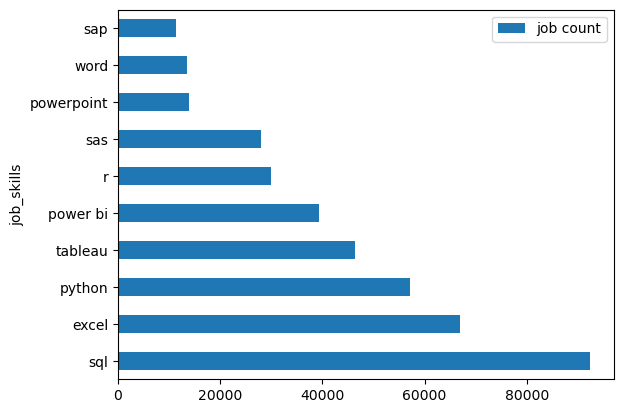

In [50]:
df_skills_final = df_skills_count[df_skills_count['job_title_short']=='Data Analyst'].sort_values(by='job count' , ascending=False).head(10)
df_skills_final

df_skills_final.plot(kind='barh', x='job_skills', y='job count')